In [2]:
import pandas as pd

data = pd.read_csv("data/superstore_sales.csv", encoding="latin1")
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Check missing values
data.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
# Remove rows with missing values
data = data.dropna()

# Confirm cleaning
data.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Convert Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

data[['Order Date']].head()


,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12
3,2015-10-11
4,2015-10-11


In [6]:
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.head()


,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [7]:
daily_sales['Day'] = daily_sales['Order Date'].dt.day
daily_sales['Month'] = daily_sales['Order Date'].dt.month
daily_sales['Year'] = daily_sales['Order Date'].dt.year

daily_sales.head()


,Order Date,Sales,Day,Month,Year
0,2014-01-03,16.448,3,1,2014
1,2014-01-04,288.060,4,1,2014
2,2014-01-05,19.536,5,1,2014
3,2014-01-06,4407.100,6,1,2014
4,2014-01-07,87.158,7,1,2014


In [8]:
X = daily_sales[['Day', 'Month', 'Year']]
y = daily_sales['Sales']


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
last_date = daily_sales['Order Date'].max()

future_dates = pd.date_range(start=last_date, periods=30)

future_df = pd.DataFrame({
    'Day': future_dates.day,
    'Month': future_dates.month,
    'Year': future_dates.year
})

future_sales = model.predict(future_df)


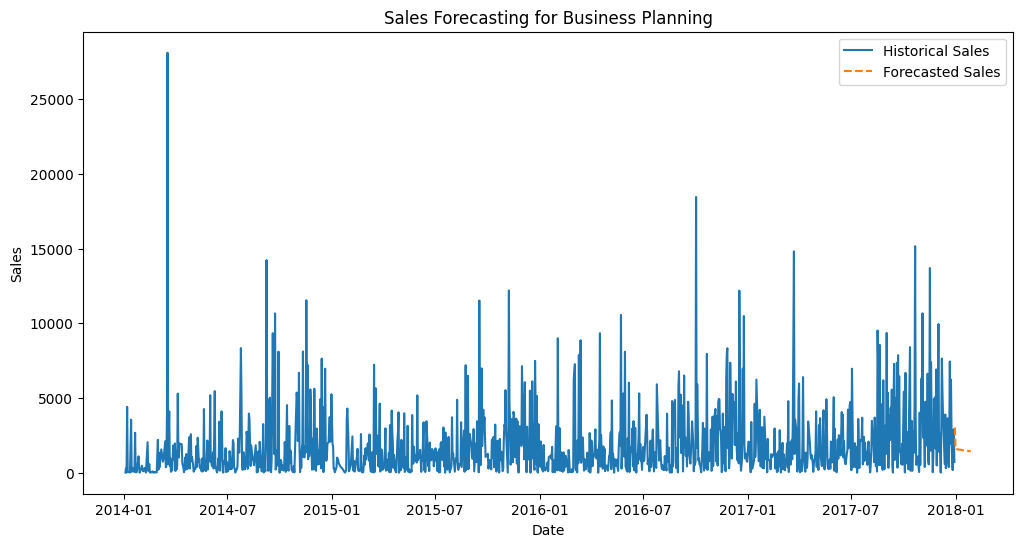

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Historical Sales')
plt.plot(future_dates, future_sales, '--', label='Forecasted Sales')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecasting for Business Planning")
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_absolute_error

predicted_sales = model.predict(X)
mae = mean_absolute_error(y, predicted_sales)

print("Mean Absolute Error:", mae)


Mean Absolute Error: 1464.9132126478878


In [ ]:
f